# Libraries and dependencies

In [1]:
import geopandas as gpd
import geoplot as gplt
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point

%matplotlib inline

# Salinity data for one month

Let us analize the salinity dataset for January 2021

In [ ]:
# Load the NetCDF file - Note that other libraries can be used to load NetCDF files
file_path = 'Salinity Data - Monthly Average\salinity_data\RSS_smap_SSS_L3_monthly_2021_01_FNL_v04.0.nc'
data_salinity = xr.open_dataset(file_path)

print(data_salinity.variables.keys())

In [ ]:
# Extract salinity, uncertainty, and relevant coordinates
sal = data_salinity['sss_smap']
sal_uncertainty = data_salinity['sss_smap_uncertainty']
sal_lon = data_salinity['lon']
sal_lat = data_salinity['lat']

In [ ]:
# Create a map projection (choose one appropriate for your region)
projection = ccrs.PlateCarree()  # Example: PlateCarree for global

# Create the figure and axes
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)

# Plot the salinity data
salinity_plot = ax.pcolormesh(sal_lon, sal_lat, sal, cmap='viridis', transform=ccrs.PlateCarree())  # You can change the colormap

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(salinity_plot, label='Sea Surface Salinity (psu)')

# Set title
plt.title('Sea Surface Salinity - January 2021')

# Show the plot
plt.show()


# Temperature data for one year

In [ ]:
# Load the NetCDF file
file_path = 'Temperature\sst.day.mean.2021.nc'
data_temperature = xr.open_dataset(file_path)

print(data_temperature.variables.keys())

In [ ]:
# Extract temperature and relevant coordinates
temp_time = data_temperature['time']
temp_lon = data_salinity['lon']
temp_lat = data_salinity['lat']
temp = data_temperature['sst']

In [ ]:
# Create a map projection (choose one appropriate for your region)
projection = ccrs.PlateCarree()  # Example: PlateCarree for global

# Create the figure and axes
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)

# Plot the salinity data
day = 0  # Change this to plot a different day
temp_plot = ax.pcolormesh(temp_lon, temp_lat, temp[day, :, :], cmap='viridis', transform=ccrs.PlateCarree())  # You can change the colormap

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(temp_plot, label='Sea Surface Temperature (C)')

# Set title
plt.title('Sea Surface Temperature - day {}, 2021'.format(day))

# Show the plot
plt.show()

# Catch fish data for one year

In [2]:
# Load csv.zip file
file_path = 'Catch Notes Datasets\\fangstdata_2005.csv.zip'
data_catch_raw = pd.read_csv(file_path, compression='zip', encoding='ISO-8859-1', delimiter=';', low_memory=False)

print(data_catch_raw.head())

   ï»¿Dokumentnummer  Dokumenttype (kode)         Dokumenttype  \
0       200000833835                    0  Sluttseddeldokument   
1       200000833835                    0  Sluttseddeldokument   
2       200000833835                    0  Sluttseddeldokument   
3       200000833835                    0  Sluttseddeldokument   
4       200000833836                    0  Sluttseddeldokument   

   Dokument versjonsnummer Dokument salgsdato Dokument versjonstidspunkt  \
0                        1         23.05.2005                 30.05.2005   
1                        1         23.05.2005                 30.05.2005   
2                        1         23.05.2005                 30.05.2005   
3                        1         23.05.2005                 30.05.2005   
4                        1         23.05.2005                 30.05.2005   

   Salgslag ID  Salgslag (kode)          Salgslag  Mottaker ID  ...  \
0    946768871                2  Skagerakfisk S/L  953264560.0  ...   
1   

In [7]:
# Keep the following columns: Landingsdato, Lon (hovedområde), Lat (hovedområde), Produktvekt
keep_columns = ['Landingsdato', 'Lon (hovedomrÃ¥de)', 'Lat (hovedomrÃ¥de)', 'Produktvekt']
data_catch = data_catch_raw.loc[:, keep_columns]

# Rename the columns
new_column_names = ['Date', 'Longitude', 'Latitude', 'Weight']
data_catch = data_catch.rename(columns=dict(zip(data_catch.columns, new_column_names)))

# Convert Longitude and Latitude columns to numeric, and Date to datetime
data_catch['Longitude'] = data_catch['Longitude'].str.replace(',', '.').astype(float)
data_catch['Latitude'] = data_catch['Latitude'].str.replace(',', '.').astype(float)
data_catch['Date'] = pd.to_datetime(data_catch['Date'])

print(data_catch.head())

        Date  Longitude  Latitude Weight
0 2005-05-23   10.42851   57.8435    4,5
1 2005-05-23   10.42851   57.8435    5,5
2 2005-05-23   10.42851   57.8435    6,4
3 2005-05-23   10.42851   57.8435      4
4 2005-05-23   10.42851   57.8435    1,5


C:\Users\dccar\AppData\Local\Temp\ipykernel_9224\2372054332.py:13: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_catch['Date'] = pd.to_datetime(data_catch['Date'])


In [4]:
# Create a new column for geometry
data_catch['geometry'] = data_catch.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(data_catch, geometry='geometry')

C:\Users\dccar\AppData\Local\Temp\ipykernel_9224\563103247.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


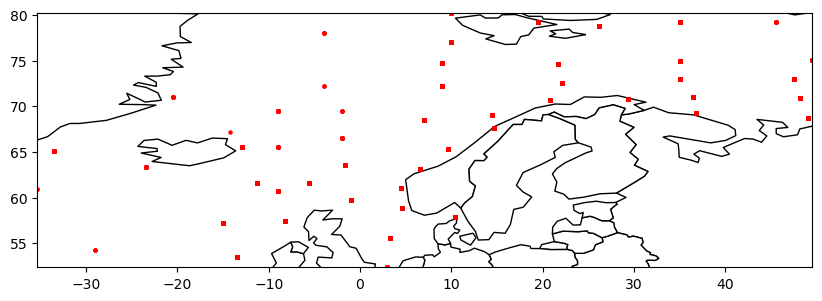

In [6]:
# Get the maximum and minimum latitude and longitude
max_latitude = data_catch['Latitude'].max()
min_latitude = data_catch['Latitude'].min()
max_longitude = data_catch['Longitude'].max()
min_longitude = data_catch['Longitude'].min()

# Create a map within the boundaries
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()